In [28]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
plt.rcParams['font.size'] = 15

In [2]:
raw=pd.read_csv('sparks001.csv')


In [3]:
raw

,Ship_Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
raw.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


now, I will check that , Is there any null values in our Raw Datasets ?

In [5]:
raw.isnull().sum()

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

i dont need postal code in my data , i will remove it.

In [6]:
raw.drop(['Postal Code'],axis=1,inplace=True)

In [64]:
raw

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Most Preferable Shipping Mode

In [8]:
pre_ship=raw.Ship_Mode.value_counts()
pre_ship

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship_Mode, dtype: int64

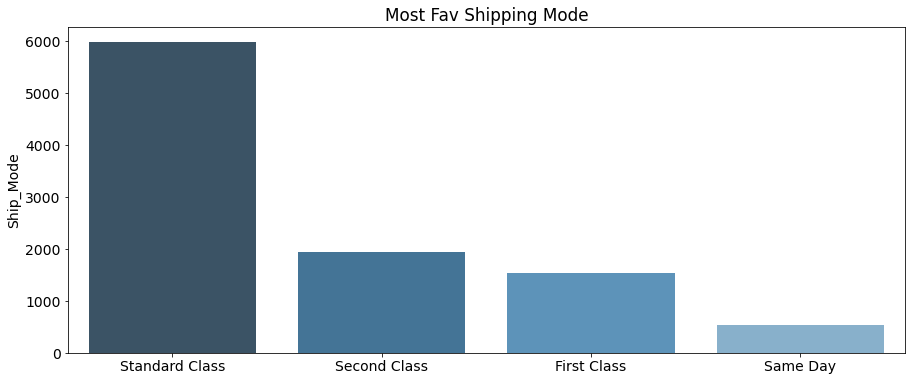

In [9]:
plt.figure(figsize=(15,6))
plt.title("Most Fav Shipping Mode")
sns.barplot(x=pre_ship.index,y=pre_ship,palette='Blues_d')

In [10]:
new_var=['City','Sales']
var_df=raw[new_var]


In [11]:
var_df

,City,Sales
0,Henderson,261.9600
1,Henderson,731.9400
2,Los Angeles,14.6200
3,Fort Lauderdale,957.5775
4,Fort Lauderdale,22.3680
...,...,...
9989,Miami,25.2480
9990,Costa Mesa,91.9600
9991,Costa Mesa,258.5760
9992,Costa Mesa,29.6000


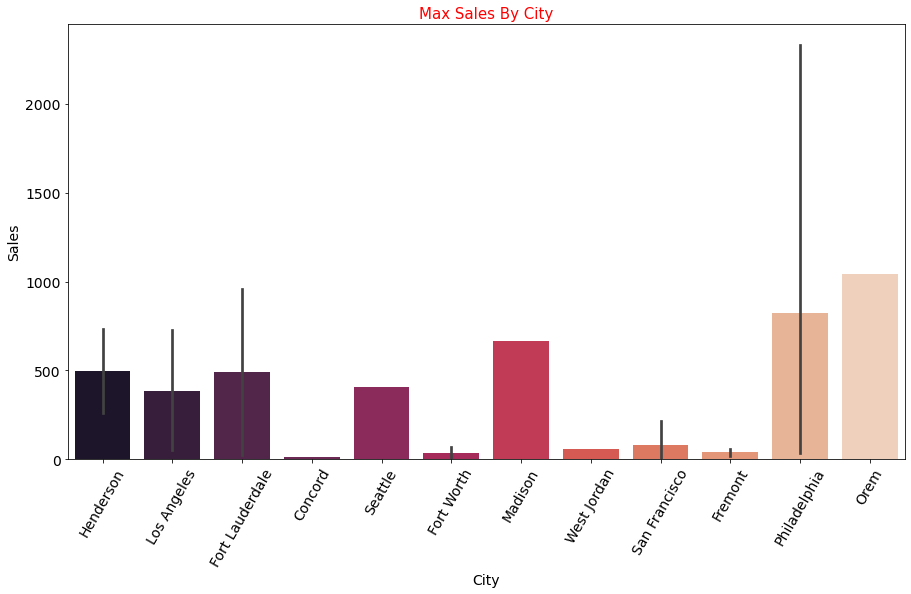

In [12]:
plt.figure(figsize=(15,8))
plt.title("Max Sales By City",color='r',size=15)
plt.xticks(rotation=60)
sns.barplot(x='City',y='Sales',data=var_df.head(30),palette='rocket')

# Profit By Categories

In [11]:
raw.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

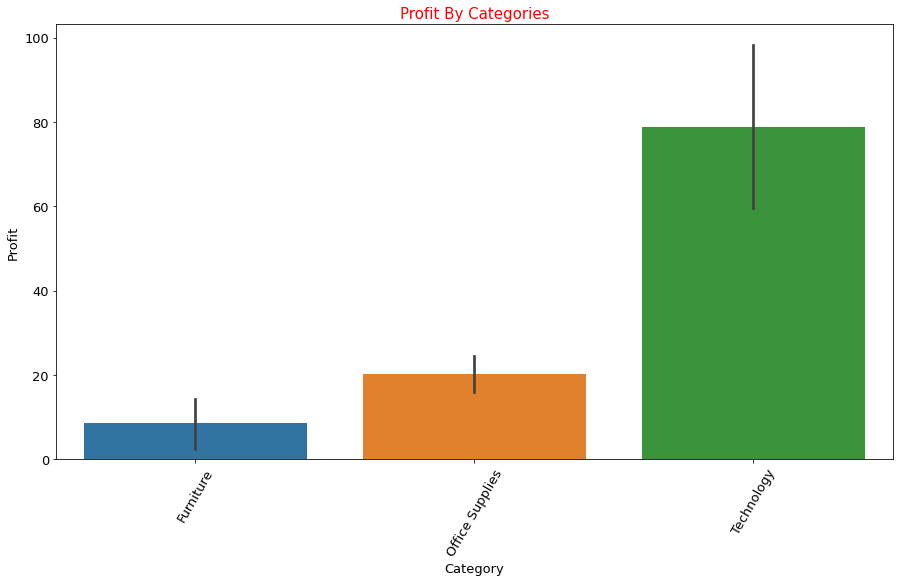

In [32]:
plt.figure(figsize=(15,8))
plt.title("Profit By Categories",color='r',size=15)
plt.xticks(rotation=60)
sns.barplot(x='Category',y='Profit',data=raw)

In [13]:
raw.Sub_Category.value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub_Category, dtype: int64

# Sub-Category(Phones)'s Profit In Different Cities

In [14]:
new=raw[['Sub_Category','City','Profit']]
phn=raw.Sub_Category=="Phones"

In [15]:
phn_df=new[phn]
top_profit=phn_df.sort_values(by=['Profit'],ascending=False)
top_profit

,Sub_Category,City,Profit
2492,Phones,Jamestown,1228.1787
7583,Phones,Springfield,909.9818
8312,Phones,Columbus,764.3818
5530,Phones,Omaha,743.9880
9398,Phones,New York City,661.4559
...,...,...,...
3587,Phones,Lancaster,-253.4337
3044,Phones,Troy,-255.7425
9673,Phones,Philadelphia,-374.9925
7509,Phones,Columbus,-377.9892


# Which Sub_Category Has Earned Max Profit in California ?

In [18]:
sta=raw[['State','Sub_Category','Profit']]
val=raw.State=="California"

In [23]:
val_df=sta[val]
state1_profit=val_df.sort_values(by=['Profit','Sub_Category'],ascending=[False,True])
state1_profit

,State,Sub_Category,Profit
8858,California,Binders,1906.4850
3273,California,Copiers,1049.9850
4619,California,Copiers,1007.9832
3983,California,Copiers,944.9865
9929,California,Copiers,944.9865
...,...,...,...
1505,California,Tables,-175.8708
3480,California,Tables,-195.4788
557,California,Tables,-217.0480
2539,California,Chairs,-219.1644


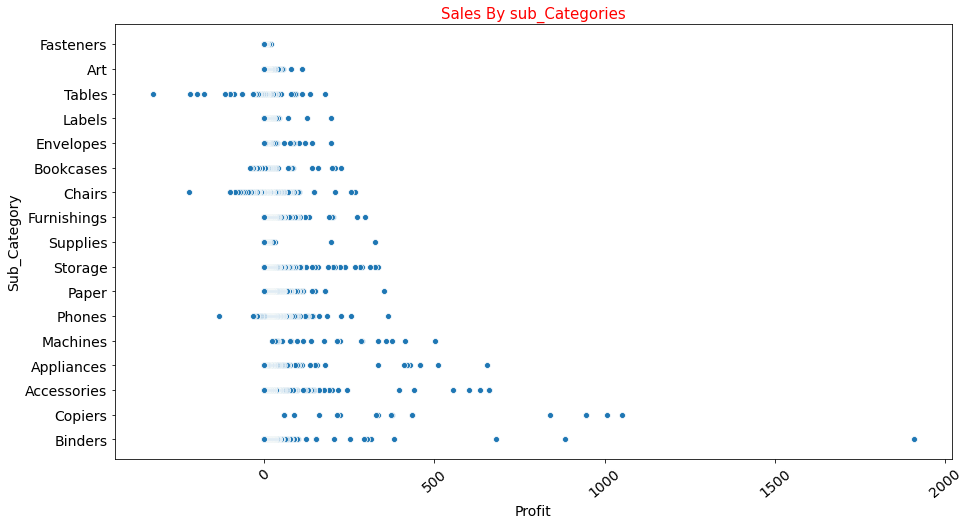

In [101]:
plt.figure(figsize=(15,8))
plt.title("Sales By sub_Categories",color='r',size=15)
plt.xticks(rotation=40)
sns.scatterplot(y='Sub_Category',x='Profit',data=state1_profit)

# Sales By Bookcases(sub_category) in Different Regions

In [40]:
new_var=raw[['Sub_Category','State','Region','Sales']]
basic1=raw.Sub_Category=='Bookcases'

In [41]:
basic=new_var[basic1]
basic_df=basic.sort_values(by=['Sales','Region'],ascending=[False,True])
basic_df


,Sub_Category,State,Region,Sales
9741,Bookcases,Vermont,East,4404.900
5917,Bookcases,New York,East,4228.704
6535,Bookcases,New York,East,4007.840
9649,Bookcases,California,West,3406.664
27,Bookcases,Pennsylvania,East,3083.430
...,...,...,...,...
6474,Bookcases,Pennsylvania,East,61.960
1302,Bookcases,Virginia,South,61.960
7565,Bookcases,Washington,West,48.580
2326,Bookcases,New York,East,46.384


<Figure size 1080x576 with 0 Axes>

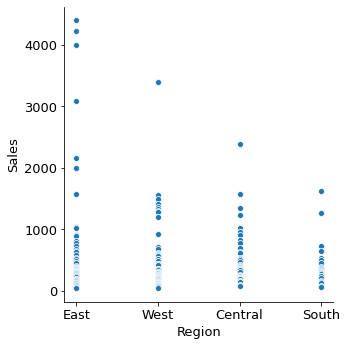

In [98]:
plt.figure(figsize=(15,8))
sns.relplot(x='Region',y='Sales',data=basic_df)


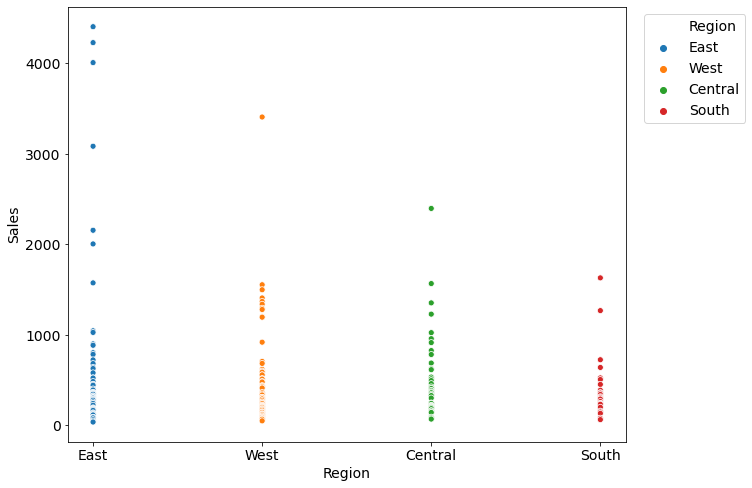

In [100]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Region',y='Sales',hue='Region',data=basic_df)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left')


In [103]:
Regions=raw.sort_values(by=['Profit'],ascending=True).head()
Regions

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845


In [118]:
new_reg=Regions.Region
Profit=Regions.Sales
Profit=Regions.Sales
Profit=Regions.Sales

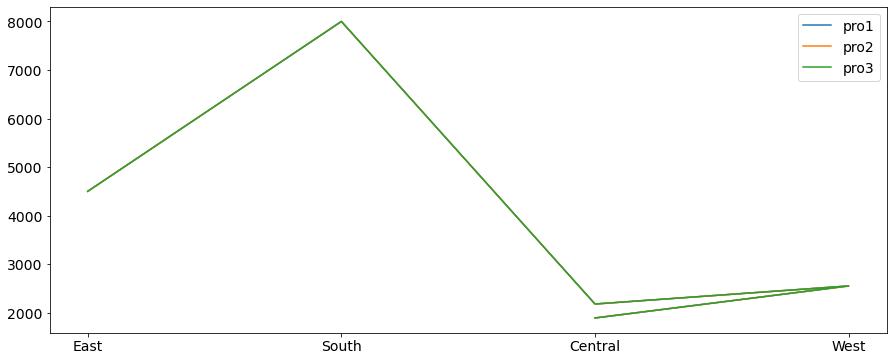

In [120]:
plt.figure(figsize=(15,6))
plt.plot(new_reg,Profit)
plt.plot(new_reg,Profit)
plt.plot(new_reg,Profit)
plt.legend(['pro1','pro2','pro3'])

In [121]:
!pip install wordcloud --quiet
from wordcloud import WordCloud

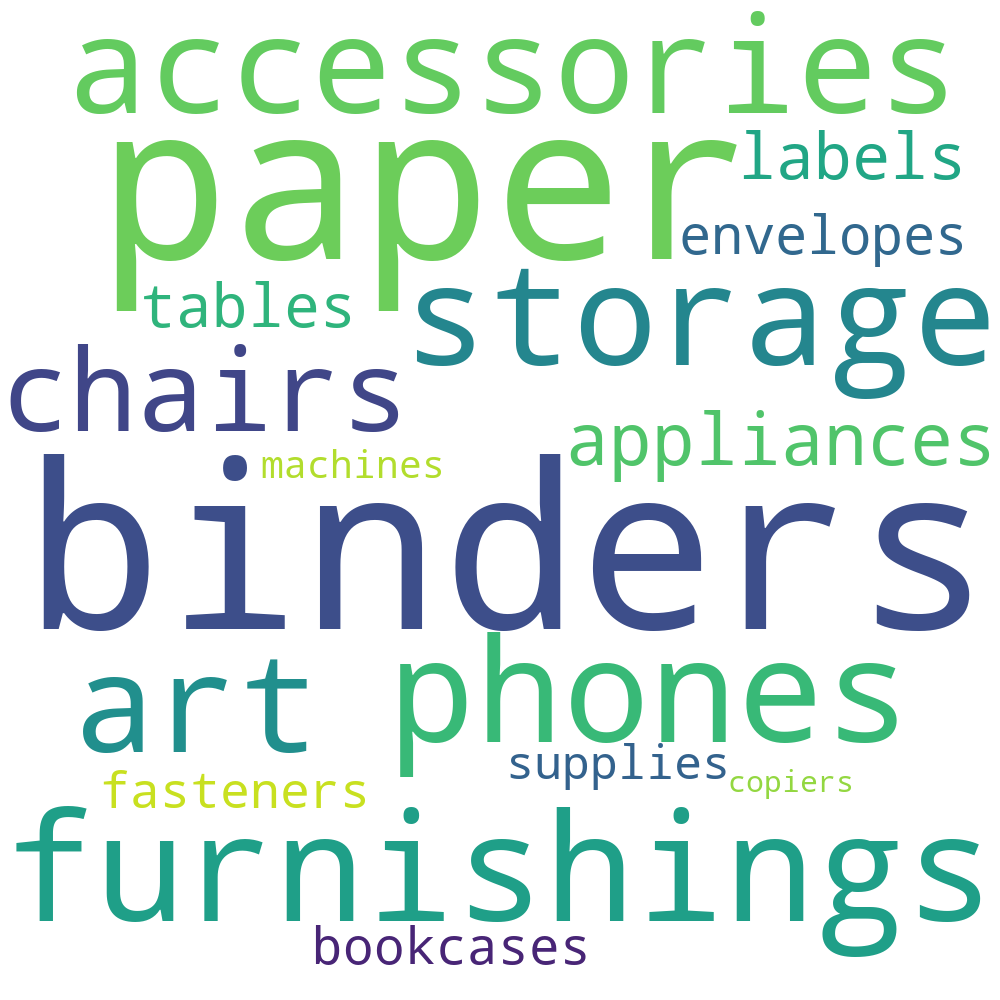

In [123]:
comment_words = ' '
  
for val in raw.Sub_Category.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
wordcloud.to_image()

In [5]:
raw

,Ship_Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
for_florida=raw[['State','Sub_Category','Sales']]
new_flor=raw.State=='Florida'

In [10]:
new_df=for_florida[new_flor]
final_flow=new_df.sort_values(by=['Sales'],ascending=False)
final_flow

,State,Sub_Category,Sales
2697,Florida,Machines,22638.480
4297,Florida,Phones,4367.896
8236,Florida,Chairs,2803.920
5185,Florida,Storage,1801.632
1046,Florida,Phones,1363.960
...,...,...,...
7311,Florida,Binders,1.872
5479,Florida,Binders,1.869
6597,Florida,Binders,1.365
9382,Florida,Art,1.344


In [12]:
final_flow.head(20)

,State,Sub_Category,Sales
2697,Florida,Machines,22638.4800
4297,Florida,Phones,4367.8960
8236,Florida,Chairs,2803.9200
5185,Florida,Storage,1801.6320
1046,Florida,Phones,1363.9600
4519,Florida,Storage,1347.5200
6048,Florida,Binders,1345.4850
990,Florida,Chairs,1166.9200
6988,Florida,Appliances,1158.1200
9565,Florida,Chairs,1125.4880


In [13]:
raw.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [16]:
raw.Sub_Category.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989     True
9990     True
9991     True
9992     True
9993     True
Name: Sub_Category, Length: 9994, dtype: bool

In [19]:
raw.loc[raw.duplicated(),:]

,Ship_Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [21]:
raw.drop_duplicates(inplace=True)

In [22]:
raw

,Ship_Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [25]:
raw.duplicated().sum()

0

# Which State Has Max Profit Using Standard Class Ship Mode ?

In [18]:
new=raw[['Ship_Mode','State','Category','Profit']]
new_df=raw.Ship_Mode=='Standard Class'

In [20]:
class1=new[new_df]
class_df=class1.sort_values(by=['Profit'],ascending=False).head(20)
class_df

,Ship_Mode,State,Category,Profit
6826,Standard Class,Indiana,Technology,8399.9760
4190,Standard Class,Delaware,Technology,5039.9856
9039,Standard Class,Michigan,Office Supplies,4946.3700
4098,Standard Class,Minnesota,Office Supplies,4630.4755
509,Standard Class,Georgia,Office Supplies,3177.4750
7666,Standard Class,Rhode Island,Technology,2591.9568
1085,Standard Class,New York,Technology,2400.9657
4277,Standard Class,New Jersey,Technology,2365.9818
8990,Standard Class,Missouri,Technology,2302.9671
6626,Standard Class,New York,Technology,2239.9872


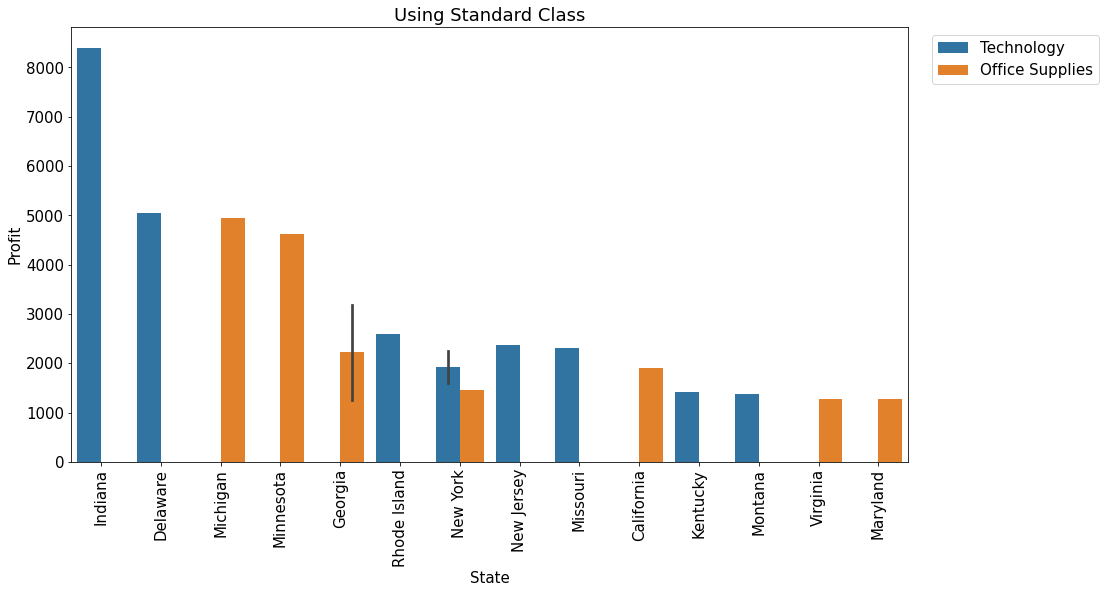

In [30]:
plt.figure(figsize=(15,8))
plt.title('Using Standard Class')
plt.xticks(rotation=90)
sns.barplot(x='State',y='Profit',hue='Category',data=class_df)
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left')

# Which Segment Has Max Profit ?

In [31]:
raw.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

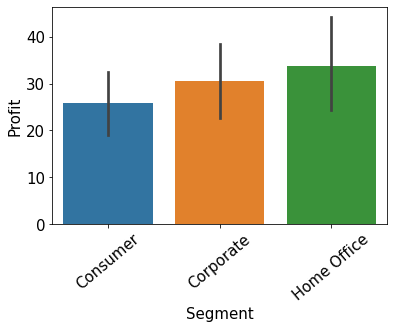

In [34]:
plt.xticks(rotation=40)
sns.barplot(x='Segment',y='Profit',data=raw)

# Most Popular Segment

([<matplotlib.patches.Wedge at 0x13641ba6f40>,
 [Text(-0.06704018356682018, 1.0979551966211223, 'Consumer'),
  Text(-0.5268843289816147, -0.9656049419268699, 'Corporate'),
  Text(0.9316986195588344, -0.5847543777622897, 'Home Office')],
 [Text(-0.03656737285462918, 0.5988846527024302, '51.9%'),
  Text(-0.28739145217178985, -0.5266936046873835, '30.2%'),
  Text(0.5081992470320914, -0.31895693332488523, '17.8%')])

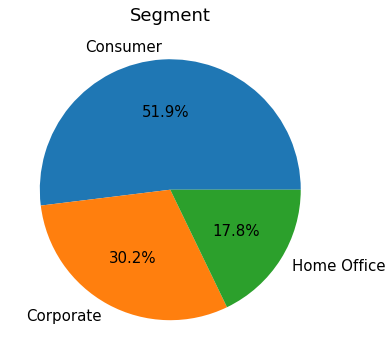

In [46]:
plt.figure(figsize = (6,6))
textprops = {"fontsize":15}
plt.title('Segment')
plt.pie(raw['Segment'].value_counts(), labels=raw['Segment'].value_counts().index,autopct='%1.1f%%')

In [58]:
city=['City','Segment','Profit']
city_df=raw[city].head()

In [59]:
city_df.sort_values(by=['Profit','Segment'],ascending=[False,False])

,City,Segment,Profit
1,Henderson,Consumer,219.5820
0,Henderson,Consumer,41.9136
2,Los Angeles,Corporate,6.8714
4,Fort Lauderdale,Consumer,2.5164
3,Fort Lauderdale,Consumer,-383.0310


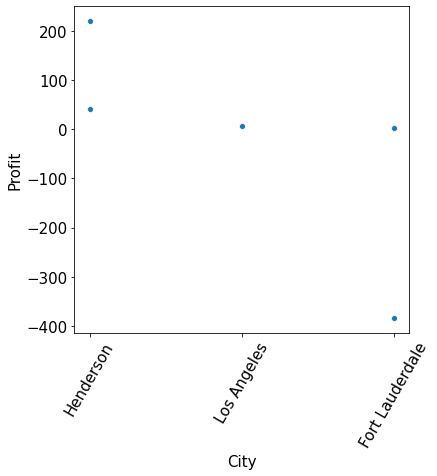

In [63]:
plt.figure(figsize = (6,6))
plt.xticks(rotation=60)
sns.scatterplot(x='City',y='Profit',palette='Blues_d',data=city_df)